# Step-1 
 Import the required packages 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- Data1:Here we will take the data which follows normal distributionn

- Data2:Based on above data we will create a another data by multiplying some value

- so that both data sets have multicollinearity

- The both datasets have some convariance

- Then we will apply PCA

- Will create two new PCs,will check the Covariance matrix again

- So the PCs covarianve should be zero

# Step-2:
Create the data


In [2]:
# willl create a data having same multicollinearity
x=np.random.normal(200,10,500)#mean=200,std=10,no of 
x.mean()

200.61021875060086

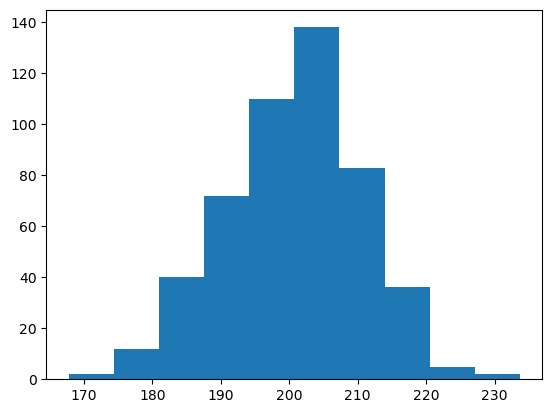

In [3]:
plt.hist(x)
plt.show()

In [4]:
# Create a data y,should be correlate to x
y=0.5*x+np.random.normal(10,5,500)
#we are taking random samples
#and we are adding x data to the samples
print('mean:',y.mean())
print('std:',y.std())


mean: 110.0923950807202
std: 7.494213834375729


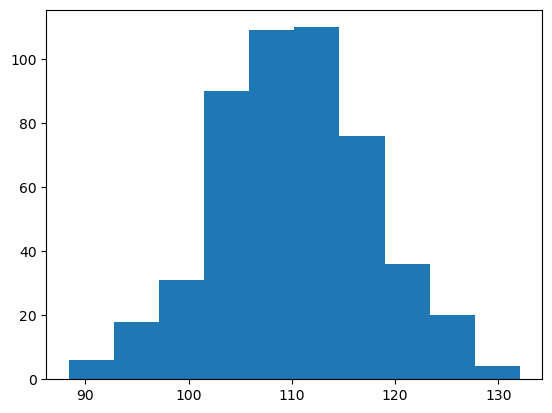

In [5]:
plt.hist(y)
plt.show()

# Step-3

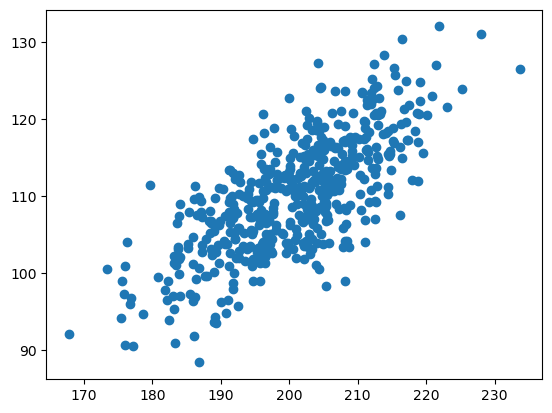

In [6]:
plt.scatter(x,y)
plt.show()

# Observations

- Both points are correlated each other

- Both points are not orthogonal to each other

- Perform covariance matrix for better idea

# Step-4

## Covariance Matrix

In [7]:
cov_mat=np.cov(x,y)
cov_mat

array([[101.92093058,  55.29148728],
       [ 55.29148728,  56.27579258]])

<Axes: >

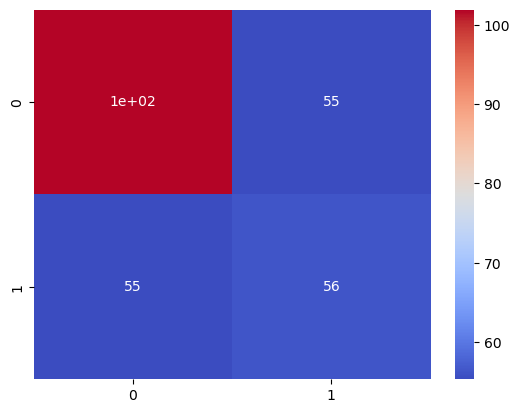

In [8]:
import seaborn as sns
sns.heatmap(cov_mat,annot=True,cmap='coolwarm')

In [9]:
# varuance =99.03
# variance=x
np.sum(np.square(x-np.mean(x)))/499

101.92093058138973

In [10]:
#cova(x,y)
a=x-np.mean(x)
b=y-np.mean(y)
np.sum(a*b)/499

55.29148728090539

$ Step-5 $
## Perform the PCA
 - to reduce the dimensions

 - to avoid multi collinearity

 - to make data has orthogonal

## Will calculate eigen vectors and eigen values of covariance matrix

# Will calculate eigen vectors and eigen values of

In [11]:
from numpy.linalg import eig
eig_Values,eig_vectors=eig(cov_mat)

In [12]:
eig_vectors

array([[ 0.83112658, -0.55608327],
       [ 0.55608327,  0.83112658]])

In [13]:
eig_Values

array([138.91489961,  19.28182355])

# Observations

- We have two data samples x and y, so we have 2x2 convaraiance matrix

- When we apply eigen values and eigen vectors on 2x2 cov matrix ,will get two eigen values and two eigen vectors

- Eigen vectors will give the indication to which direction data should flow

- if you see eigen vectors the maginitude is same but the direction is different

- the dot product of eigen values either one or zero,indicates orthogonality

- Eigen values represents how much data should flow along the particula  direction

# Check pint-1

  - Perform the dot product of two eigen vectors

  - cos90 is zero

  - we are expecting dot product of two eigen vectors is zero

  - dot product means cos

  - coross product means sin

  - dot product: cosine similarity

In [14]:
v1=eig_vectors[0]
v2=eig_vectors[1]
np.dot(v1,v2)

0.0

# check point-2

- Data variance along each diection

- Percentage of data floes in each direction

- we will use eign\\\en values,each eigen values divided by sum of the eigen values

In [15]:
eig_Values

array([138.91489961,  19.28182355])

In [16]:
127/(127+20),20/(127+20)

(0.8639455782312925, 0.1360544217687075)

In [17]:
print("The variance percentage:",eig_Values[0]*100/sum(eig_Values))
print('The variane percentage:',eig_Values[1]*100/sum(eig_Values))

The variance percentage: 87.81148991664419
The variane percentage: 12.188510083355816


 step-6

 creapte a new PC's data

 new data = old data * eigen vectors

In [18]:
z=np.vstack([x,y]).T
# Stackinf means joining together or combining
#Vertically stacking
#T=Transpose of the data it will convert the 2D data to array it becom 2D beacouse of usng stack it combines two araar into 2D and
#it form row on top of each other like first x and then y but using .T the row will be like left x and right y eg [x=198.23727769, y=103.65307783]
#Before .T: You stacked x and y as two rows on top of each other (2D array of shape (2, 500)).

#After .T: You swapped the rows and columns, so you get a 2D array of shape (500, 2) where each row contains one value from x and the corresponding value from y.
# X Y
z

array([[212.91621673, 120.52688299],
       [212.80182054, 115.19354633],
       [206.86318767, 116.37156956],
       [203.36086688, 107.657971  ],
       [193.91881412, 108.32089715],
       [207.5862862 , 113.58039062],
       [183.79615114, 103.16212432],
       [214.43082087, 115.53134438],
       [192.77894322, 111.8299665 ],
       [192.62370307, 102.91642932],
       [201.82485968, 106.7919728 ],
       [200.38073639, 108.61728967],
       [204.86845178, 114.90691644],
       [186.13304474,  91.87845115],
       [194.74073614, 109.25026464],
       [196.9820253 , 106.97847252],
       [210.47157456, 108.22560341],
       [197.14613136, 105.08289844],
       [183.05382407,  97.08627998],
       [187.22496099, 103.67646066],
       [195.53231422, 109.26218542],
       [201.05681592, 110.02898134],
       [190.75285182,  94.87662797],
       [214.82617404, 113.4040003 ],
       [215.17512422, 117.23884863],
       [194.69109901, 105.51516723],
       [195.74358465,  98.99265681],
 

In [19]:
eig_vectors

array([[ 0.83112658, -0.55608327],
       [ 0.55608327,  0.83112658]])

In [20]:
new_Data=np.dot(z,eig_vectors)
new_Data=pd.DataFrame(new_Data,columns=['PC1','PC2'])
new_Data
#under these two pc2 we will select pc1
#then ML model will develop PC1

,PC1,PC2
0,243.983311,-18.226050
1,240.922454,-22.595114
2,236.641777,-18.313653
3,228.885419,-23.608174
4,221.406520,-17.806631
...,...,...
495,224.963357,-24.929374
496,229.153764,-22.568516
497,196.724225,-22.453580
498,232.197597,-19.806704


In [21]:
pc1=new_Data['PC1'].values
pc2=new_Data['PC2'].values

In [22]:
cov_mat=np.cov(pc1,pc2)

In [23]:
cov_mat

array([[ 1.38914900e+02, -1.57202241e-14],
       [-1.57202241e-14,  1.92818236e+01]])

# Scatter plot of new pcs data

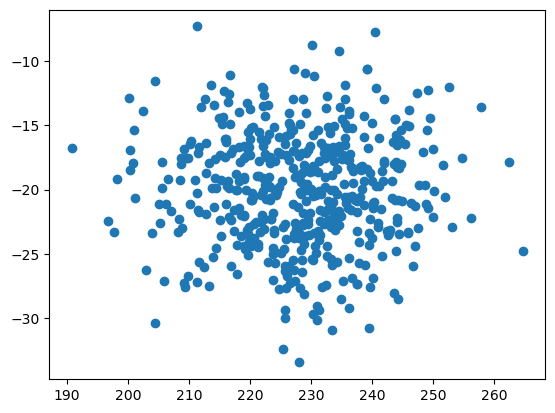

In [24]:
plt.scatter(pc1,pc2)

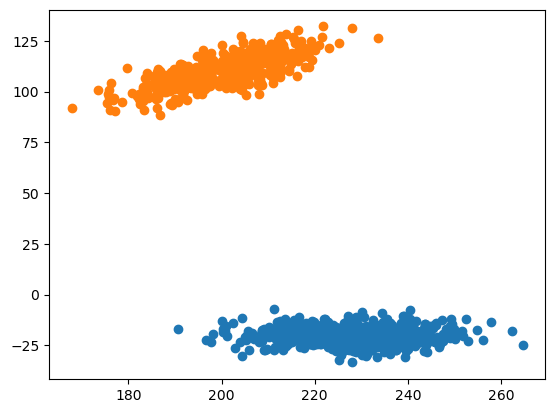

In [25]:
plt.scatter(new_Data['PC1'],new_Data['PC2'])# Blue no correlation
plt.scatter(x,y)#Prange #Correlation
plt.show()

## Observations

- we create a new data has two pcs
- the two pcs includes old data
- the two pcs are indepenpedent each other
- the vatiance along PC1 is greater than PC2
- o we can choose only one componenet i.e PC!

In [26]:
#From 5:30 PM batch
from sklearn.decomposition import PCA

In [28]:
x=np.random.normal(200,10,500)
y=0.5*x+np.random.normal(10,5,500)


data = np.column_stack((x, y))

Explained variance ratio: [0.88871106 0.11128894]
Principal components (directions):
 [[ 0.85882453  0.51226988]
 [-0.51226988  0.85882453]]


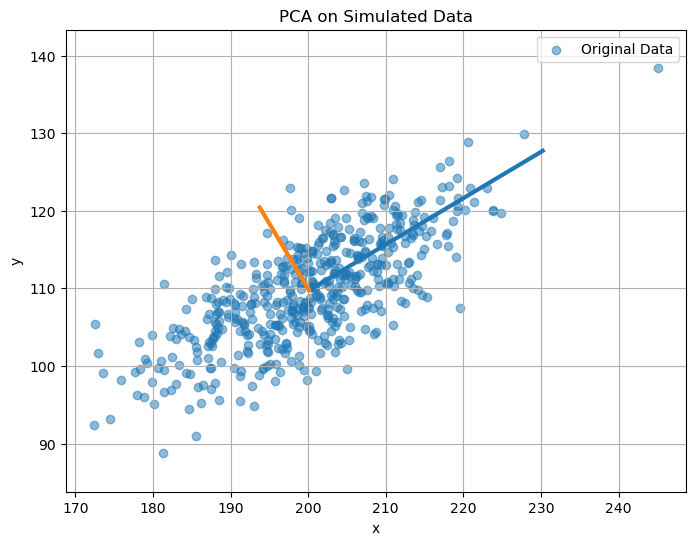

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 1: Generate the data
x = np.random.normal(200, 10, 500)
y = 0.5 * x + np.random.normal(10, 5, 500)

# Step 2: Combine x and y into a 2D array for PCA
data = np.column_stack((x, y))  # Shape: (500, 2)

# Step 3: Perform PCA
pca = PCA(n_components=2)
pca.fit(data)

# Step 4: Transform the data to the PCA space
data_pca = pca.transform(data)

# Step 5: Print explained variance (optional)
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Principal components (directions):\n", pca.components_)

# Step 6: (Optional) Visualize the original data and the PCA axes
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5, label='Original Data')

# Plot PCA axes
mean = np.mean(data, axis=0)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)  # Scale for visualization
    plt.plot([mean[0], mean[0] + v[0]], [mean[1], mean[1] + v[1]], linewidth=3)

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('PCA on Simulated Data')
plt.axis('equal')
plt.grid(True)
plt.show()
#jusst see it its given by chat gpt


In [30]:
# Step 2: Combine x and y into a 2D array for PCA
data = np.column_stack((x, y))  # Shape: (500, 2)

# Step 3: Perform PCA
pca = PCA(n_components=2)
pca.fit(data)

PCA(n_components=2)

In [31]:
pca.transform(z)

array([[ 1.65041094e+01,  2.68912219e+00],
       [ 1.36737554e+01, -1.83267643e+00],
       [ 9.17697768e+00,  2.22122156e+00],
       [ 1.70538460e+00, -3.46809716e+00],
       [-6.06408482e+00,  1.93811930e+00],
       [ 8.36815553e+00, -5.46332970e-01],
       [-1.74003600e+01,  2.69317401e+00],
       [ 1.52458246e+01, -2.37705498e+00],
       [-5.24544337e+00,  5.53571567e+00],
       [-9.94490403e+00, -2.03992385e+00],
       [-5.74008587e-02, -3.42498744e+00],
       [-3.62594509e-01, -1.11757966e+00],
       [ 6.71355189e+00,  1.98518465e+00],
       [-2.11736644e+01, -8.19464148e+00],
       [-4.88211105e+00,  2.31523701e+00],
       [-4.12100763e+00, -7.83978710e-01],
       [ 8.10301575e+00, -6.62320189e+00],
       [-4.95111482e+00, -2.49601082e+00],
       [-2.11503608e+01, -2.14463834e+00],
       [-1.41921350e+01,  1.37842266e+00],
       [-4.19617773e+00,  1.91997326e+00],
       [ 9.41206295e-01, -2.51519415e-01],
       [-1.56701851e+01, -7.98632170e+00],
       [ 1.

In [32]:
pca.explained_variance_ratio_

array([0.88871106, 0.11128894])